In [15]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)
import seaborn as sns
from pesummary.core.plots.bounded_1d_kde import bounded_1d_kde

In [5]:
from pycbc.inference import io,models

# An example of PDF

In [38]:
f = io.loadfile('/work/cdcapano/projects/gated_gaussian/gw190521/reruns/set1/220_330/samples-06.hdf','r')

In [39]:
pos = f.read_samples(['amp330'])

<AxesSubplot:ylabel='Density'>

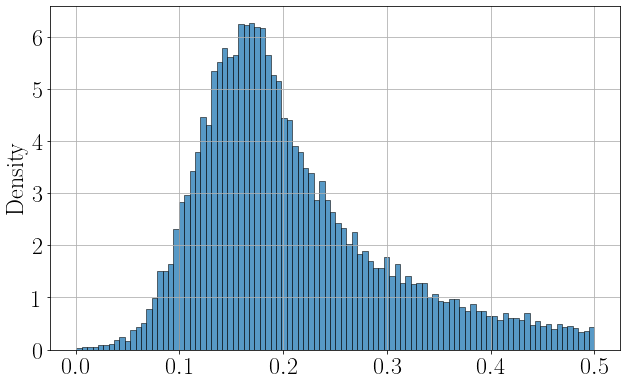

In [41]:
sns.histplot(pos['amp330'],stat='density')

In [42]:
pdf = bounded_1d_kde(pos['amp330'], xlow=0, xhigh=0.5, method="Reflection")

In [43]:
pdf(0)

array([0.04262642])

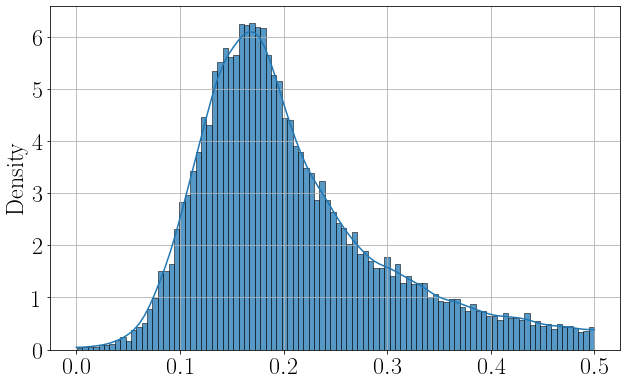

In [44]:
sns.histplot(pos['amp330'],stat='density')
x = np.linspace(0,0.5,100)
plt.plot(x,pdf(x))

# Savage Dickey Density Ratio

In [34]:
def savage_dickey(hdfpath,par='amp330',prior_low=0,prior_high=0.5):
    '''
    Compute the Bayes Factor given a hdf file's path 
    '''
    f = io.loadfile(hdfpath,'r')
    pos = f.read_samples([par])
    pdf = bounded_1d_kde(pos[par], xlow=prior_low, xhigh=prior_high, method="Reflection") #PDF
    prior = 1/ (prior_high-prior_low) #uniform distribution
    return prior/pdf(0) #BF = prior(0) / posterior(0)

# 6 MS

In [35]:
for i in range(1,10+1):
    path330 = '/work/cdcapano/projects/gated_gaussian/gw190521/reruns/set'+str(i)+'/220_330/samples-06.hdf'
    path221 = '/work/cdcapano/projects/gated_gaussian/gw190521/reruns/set'+str(i)+'/220_221/samples-06.hdf'
    bf330 = savage_dickey(path330,par='amp330',prior_low=0,prior_high=0.5)
    bf221 = savage_dickey(path221,par='amp221',prior_low=0,prior_high=5)
    print('set',i,'BF with savage dickey is:',bf330/max(1,bf221))

set 1 BF with savage dickey is: [59.90692548]
set 2 BF with savage dickey is: [55.07656063]
set 3 BF with savage dickey is: [51.59299489]
set 4 BF with savage dickey is: [50.68374432]
set 5 BF with savage dickey is: [52.33595213]
set 6 BF with savage dickey is: [58.20368394]
set 7 BF with savage dickey is: [58.1993855]
set 8 BF with savage dickey is: [52.29623676]
set 9 BF with savage dickey is: [62.02718388]
set 10 BF with savage dickey is: [55.43172424]


# 7 MS

In [36]:
for i in range(1,10+1):
    path330 = '/work/cdcapano/projects/gated_gaussian/gw190521/reruns/set'+str(i)+'/220_330/samples-07.hdf'
    path221 = '/work/cdcapano/projects/gated_gaussian/gw190521/reruns/set'+str(i)+'/220_221/samples-07.hdf'
    bf330 = savage_dickey(path330,par='amp330',prior_low=0,prior_high=0.5)
    bf221 = savage_dickey(path221,par='amp221',prior_low=0,prior_high=5)
    print('set',i,'BF with savage dickey is:',bf330/max(1,bf221))

set 1 BF with savage dickey is: [46.53810702]
set 2 BF with savage dickey is: [45.62318842]
set 3 BF with savage dickey is: [39.77091854]
set 4 BF with savage dickey is: [39.90679052]
set 5 BF with savage dickey is: [41.43824951]
set 6 BF with savage dickey is: [55.31384464]
set 7 BF with savage dickey is: [56.56632078]
set 8 BF with savage dickey is: [46.58426811]
set 9 BF with savage dickey is: [44.14577426]
set 10 BF with savage dickey is: [50.86626599]


# More live

In [37]:
path330 = '/work/cdcapano/projects/gated_gaussian/gw190521/reruns/more_livepoints/220_330/samples-06.hdf'
path221 = '/work/cdcapano/projects/gated_gaussian/gw190521/reruns/more_livepoints/220_221/samples-06.hdf'
bf330 = savage_dickey(path330,par='amp330',prior_low=0,prior_high=0.5)
bf221 = savage_dickey(path221,par='amp221',prior_low=0,prior_high=5)
print('BF with savage dickey is:',bf330/max(1,bf221))

BF with savage dickey is: [55.07342846]


In [45]:
path330 = '/work/cdcapano/projects/gated_gaussian/gw190521/reruns/more_livepoints/220_330/samples-07.hdf'
path221 = '/work/cdcapano/projects/gated_gaussian/gw190521/reruns/more_livepoints/220_221/samples-07.hdf'
bf330 = savage_dickey(path330,par='amp330',prior_low=0,prior_high=0.5)
bf221 = savage_dickey(path221,par='amp221',prior_low=0,prior_high=5)
print('BF with savage dickey is:',bf330/max(1,bf221))

BF with savage dickey is: [44.25620757]
